
### Importing Libraries

In [273]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

### Loading Training dataset

In [274]:
df=pd.read_csv('train.csv')

### Checking Dataset

In [275]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


### Checking for Null Values

In [276]:
df.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

#### We can clearly see that Credit product have null values around 29 thousand

### Checking for distribution of Numerical values

In [277]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

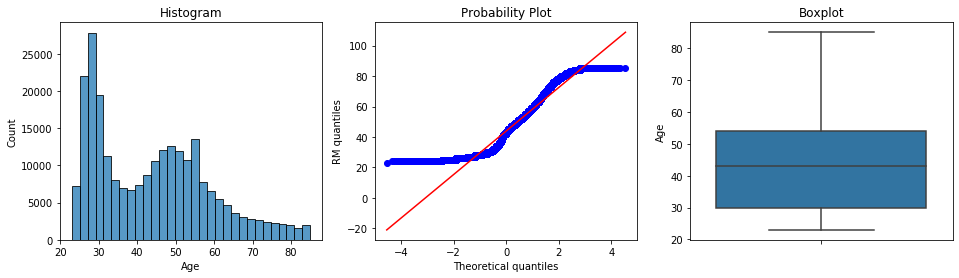

In [278]:

diagnostic_plots(df, 'Age')

#### Since the histogram is shifted toward left hence it is skewed and the boxplot also show that it doesn't have any outliers

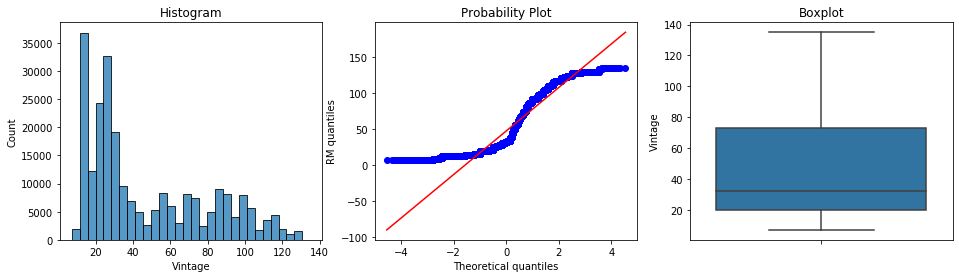

In [279]:
diagnostic_plots(df, 'Vintage')

#### Similarly this variable is also skewed and also dont have any outliers

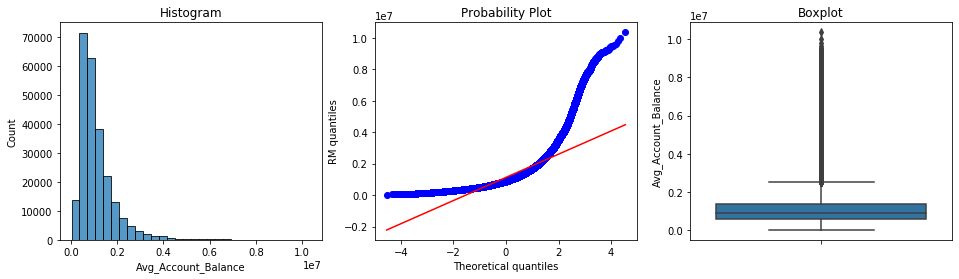

In [280]:
diagnostic_plots(df,'Avg_Account_Balance')

#### This variable is skewed but it contain lot of outliers as we can see from boxplot.

#### Using  IQR to find outlier and handling outliers

In [281]:

def skewed_boundaries(df, variable, distance):

   
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower = df[variable].quantile(0.25) - (IQR * distance)
    upper = df[variable].quantile(0.75) + (IQR * distance)

    return upper, lower

## For Age Variable

In [282]:
upper, lower = skewed_boundaries(df, 'Age', 1.5)
upper, lower

(90.0, -6.0)

In [283]:
print('Age bigger than 90: {}'.format(
    len(df[df['Age'] > upper])))
print()
print('% of People bigger than age 90: {}'.format(
    len(df[df['Age'] > upper])/len(df)))

Age bigger than 90: 0

% of People bigger than age 90: 0.0


##### Since there are no age instance bigger than 90 hence there is no outlier while for lower boundary since it is in negative and age cant be in negative hence we are not checking for lower boundary

## For Vintage Variable

In [284]:
upper1, lower1 = skewed_boundaries(df, 'Vintage', 1.5)
upper1, lower1

(152.5, -59.5)

In [285]:
print('Vintage bigger than 152.5: {}'.format(
    len(df[df['Vintage'] > upper1])))
print()
print('% Vintage bigger than 32: {}'.format(
    len(df[df['Vintage'] > upper1])/len(df)))

Vintage bigger than 152.5: 0

% Vintage bigger than 32: 0.0


#### Since there are no instane greater than 152.5 hence there is no outliers 

## Avg_Account_Balance

In [286]:
upper3, lower3 = skewed_boundaries(df, 'Avg_Account_Balance', 1.5)
upper, lower

(90.0, -6.0)

In [287]:
print('Avg_Account_Balance greater than 2510200: {}'.format(
    len(df[df['Avg_Account_Balance'] > upper3])))
print()
print('% Avg_Account balance  greater than 2510200: {}'.format(
    len(df[df['Avg_Account_Balance'] > upper3])/len(df)))

Avg_Account_Balance greater than 2510200: 14612

% Avg_Account balance  greater than 2510200: 0.05946484891647166


#### We can clearly see that around 5.9 percent of outlier were detected in this variable

## Handling Outlier 

### We have used two methods to handle outlier :- Capping and removing outliers
                                                 

### Capping

In [288]:
#df['Avg_Account_Balance']= np.where(df['Avg_Account_Balance'] > upper3, upper3,
                       #np.where(df['Avg_Account_Balance'] < lower3, lower3, df['Avg_Account_Balance']))

###  Removing Outliers

In [289]:
outliers_RM = np.where(df['Avg_Account_Balance'] > upper3, True,
                       np.where(df['Avg_Account_Balance'] < lower3, True, False))
df= df.loc[~(outliers_RM )]

Sincce we have used both methods for this dataset we found that in both method roc-auc score was pretty similar hence we preffer to remove outliers

### Checking For Dependent Vairable Is_Lead

Text(0.5, 0, 'Class')

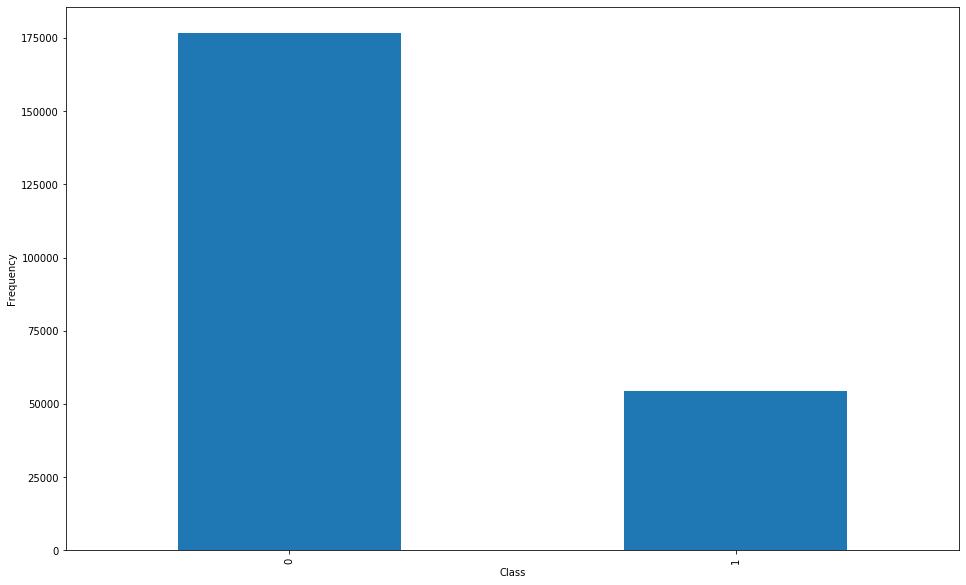

In [290]:
count_class = pd.value_counts(df['Is_Lead'])
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
count_class.plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Class')

#### We can clearly see that 0 has more values than 1 hence it can be considered as imblanced dataset problem 

## Checking for correlations

In [291]:
df.corr()

,Age,Vintage,Avg_Account_Balance,Is_Lead
Age,1.000000,0.630960,0.167747,0.233613
Vintage,0.630960,1.000000,0.191041,0.277626
Avg_Account_Balance,0.167747,0.191041,1.000000,0.074321
Is_Lead,0.233613,0.277626,0.074321,1.000000


#### We can clearly see that no variable has correlation greater than 0.7 hence correlation is not that strong

## Checking for Categorical Variables

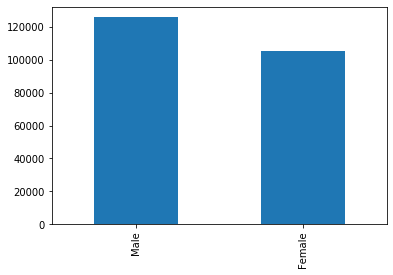

In [292]:
df['Gender'].value_counts().plot(kind='bar')

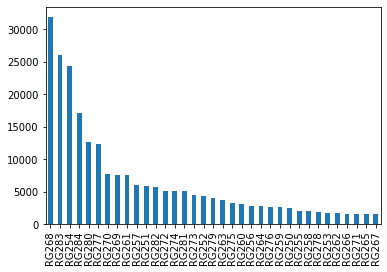

In [293]:
df['Region_Code'].value_counts().plot(kind='bar')

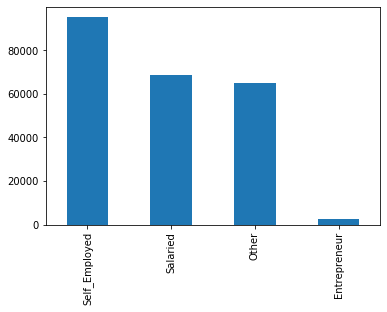

In [294]:
df['Occupation'].value_counts().plot(kind='bar')

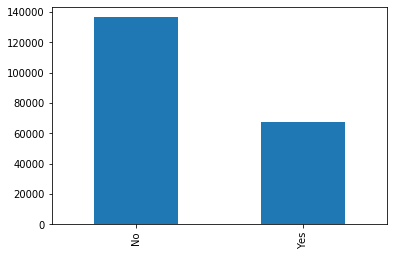

In [295]:
df['Credit_Product'].value_counts().plot(kind='bar')

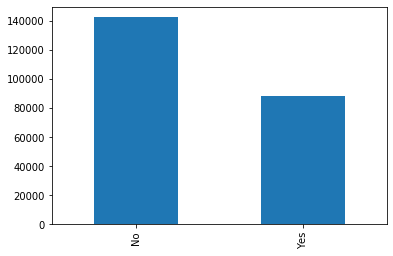

In [296]:
df['Is_Active'].value_counts().plot(kind='bar')

## Preparing Dataset

#### First we are going to drop ID as we have unique id in whole dataset hence it is of no use to us

In [297]:
a=df.drop(['ID'],axis=1)

####  Handling Null values of Credit_Product

In [298]:
df.isnull().mean()

ID                     0.000000
Gender                 0.000000
Age                    0.000000
Region_Code            0.000000
Occupation             0.000000
Channel_Code           0.000000
Vintage                0.000000
Credit_Product         0.118228
Avg_Account_Balance    0.000000
Is_Active              0.000000
Is_Lead                0.000000
dtype: float64

##### We can clearly see that this % of data is missing in this variable

In [299]:
df_most_common_imputed = a.apply(lambda x: x.fillna(x.value_counts().index[0]))
df_most_common_imputed.tail()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
245720,Male,51,RG284,Self_Employed,X3,109,No,1925586,No,0
245721,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,Female,28,RG273,Salaried,X1,31,No,407504,No,0
245724,Male,29,RG269,Salaried,X1,21,No,1129276,No,0


In [300]:
df_most_common_imputed['Credit_Product'].value_counts()

No     163769
Yes     67344
Name: Credit_Product, dtype: int64

In [301]:
b=df_most_common_imputed

##### Defining Target and independent variables

In [302]:
target2=b['Is_Lead']
value2=b.drop(labels=['Is_Lead'], axis=1)


##### Splitting dataset into Train and Validation set

In [303]:
from sklearn.model_selection import train_test_split
XTRAIN, XVAL, YTRAIN, YVAL = train_test_split(value2, target2,
                                                    shuffle=True,
                                                    test_size=0.1, random_state=44)

In [304]:
XTRAIN

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
165077,Male,75,RG268,Other,X3,117,No,743506,No
46607,Male,50,RG284,Self_Employed,X2,98,No,1612315,No
34634,Female,45,RG283,Self_Employed,X2,103,No,1362340,No
63304,Female,27,RG262,Salaried,X1,14,No,1134242,No
23720,Female,29,RG260,Salaried,X1,21,No,622652,No
...,...,...,...,...,...,...,...,...,...
195873,Male,25,RG255,Salaried,X1,13,Yes,623124,No
52877,Male,43,RG254,Other,X2,25,No,551853,Yes
166881,Female,29,RG256,Salaried,X1,13,No,780975,No
212752,Male,48,RG277,Self_Employed,X2,86,No,566164,Yes


In [305]:
XTRAIN= pd.DataFrame(XTRAIN, columns = value2.columns)

### Using One Hot Encoding for categorical variables

In [306]:

from feature_engine.encoding import OneHotEncoder as fe_OneHotEncoder
ohe_enc = fe_OneHotEncoder(
    top_categories=None,
    variables=['Gender','Occupation','Is_Active','Channel_Code','Region_Code','Credit_Product'],  # we can select which variables to encode
    drop_last=True)  # to return k-1, false to return k


ohe_enc.fit(XTRAIN)

XTRAIN= ohe_enc.transform(XTRAIN)

XTRAIN.head()

XVAL= ohe_enc.transform(XVAL)

#### Scaling the dataset as Avg_Account balance value is very big which can dominate whole dataset

In [307]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_std=sc.fit_transform(XTRAIN)
X_validation_std=sc.transform(XVAL)

## Using Kmeans SMOTE :- Oversampling technique for balancing dataset

In [308]:
from sklearn.cluster import KMeans

from imblearn.over_sampling import KMeansSMOTE

sm = KMeansSMOTE(
    sampling_strategy='auto',  # samples only the minority class
    random_state=0,  # for reproducibility
    k_neighbors=2,
    n_jobs=None,
    kmeans_estimator=KMeans(n_clusters=3, random_state=0),
    cluster_balance_threshold=0.1,
    density_exponent='auto'
)


X_train_std, YTRAIN = sm.fit_resample(X_train_std, YTRAIN)

In [171]:
#X_train_std= pd.DataFrame(XTRAIN, columns = value2.columns)
#X_validation_std=pd.DataFrame(XTRAIN, columns = value2.columns)

### USING LGBM Classifier

In [309]:
lgb_params= {'learning_rate': 0.045, 
             'n_estimators': 20000, 
             'max_bin': 94,
             'num_leaves': 10, 
             'max_depth': 27, 
             'reg_alpha': 8.457, 
             'reg_lambda': 6.853, 
             'subsample': 0.749}

In [310]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, StratifiedKFold

def cross_val(X, y, model, params, folds=9):

    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=21)
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

        alg = model(**params)
        alg.fit(x_train, y_train,
                eval_set=[(x_test, y_test)],
                early_stopping_rounds=100,
                verbose=400)

        pred = alg.predict_proba(x_test)[:, 1]
        roc_score = roc_auc_score(y_test, pred)
        print(f"roc_auc_score: {roc_score}")
        print("-"*50)
    
    return alg


#### Converting X_train and Ytrain back to dataframe

In [311]:
X_train_std=pd.DataFrame(X_train_std, columns = XTRAIN.columns)

In [312]:
X_train_std.head()

,Age,Vintage,Avg_Account_Balance,Gender_Male,Occupation_Other,Occupation_Self_Employed,Occupation_Salaried,Is_Active_No,Channel_Code_X3,Channel_Code_X2,...,Region_Code_RG265,Region_Code_RG252,Region_Code_RG267,Region_Code_RG266,Region_Code_RG269,Region_Code_RG259,Region_Code_RG250,Region_Code_RG281,Region_Code_RG255,Credit_Product_No
0,2.140434,2.210968,-0.451005,0.914280,1.600519,-0.836656,-0.649881,0.787951,1.631837,-0.617736,...,-0.081754,-0.137218,-0.080735,-0.082791,-0.183938,-0.106437,-0.104149,-0.149159,-0.094005,0.641271
1,0.438165,1.617287,1.285447,0.914280,-0.624797,1.195234,-0.649881,0.787951,-0.612806,1.618813,...,-0.081754,-0.137218,-0.080735,-0.082791,-0.183938,-0.106437,-0.104149,-0.149159,-0.094005,0.641271
2,0.097711,1.773519,0.785832,-1.093757,-0.624797,1.195234,-0.649881,0.787951,-0.612806,1.618813,...,-0.081754,-0.137218,-0.080735,-0.082791,-0.183938,-0.106437,-0.104149,-0.149159,-0.094005,0.641271
3,-1.127922,-1.007410,0.329942,-1.093757,-0.624797,-0.836656,1.538742,0.787951,-0.612806,-0.617736,...,-0.081754,-0.137218,-0.080735,-0.082791,-0.183938,-0.106437,-0.104149,-0.149159,-0.094005,0.641271
4,-0.991741,-0.788685,-0.692551,-1.093757,-0.624797,-0.836656,1.538742,0.787951,-0.612806,-0.617736,...,-0.081754,-0.137218,-0.080735,-0.082791,-0.183938,-0.106437,-0.104149,-0.149159,-0.094005,0.641271


In [313]:
YTRAIN=pd.DataFrame(YTRAIN)

In [ ]:
from lightgbm import LGBMClassifier
lgb_model = cross_val(X_train_std, YTRAIN, LGBMClassifier, lgb_params)

Fold: 0


c:\users\61478\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.377281
[800]	valid_0's binary_logloss: 0.351271
[1200]	valid_0's binary_logloss: 0.343216
[1600]	valid_0's binary_logloss: 0.339079
[2000]	valid_0's binary_logloss: 0.336366
[2400]	valid_0's binary_logloss: 0.334358
[2800]	valid_0's binary_logloss: 0.333348
[3200]	valid_0's binary_logloss: 0.332313
[3600]	valid_0's binary_logloss: 0.331766
[4000]	valid_0's binary_logloss: 0.331171
[4400]	valid_0's binary_logloss: 0.330781
[4800]	valid_0's binary_logloss: 0.330435
[5200]	valid_0's binary_logloss: 0.330058
[5600]	valid_0's binary_logloss: 0.329848
[6000]	valid_0's binary_logloss: 0.329647
[6400]	valid_0's binary_logloss: 0.329491
[6800]	valid_0's binary_logloss: 0.329319
Early stopping, best iteration is:
[7046]	valid_0's binary_logloss: 0.329222
roc_auc_score: 0.9232221260243988
--------------------------------------------------
Fold: 1


c:\users\61478\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.384509
[800]	valid_0's binary_logloss: 0.358945
[1200]	valid_0's binary_logloss: 0.35013
[1600]	valid_0's binary_logloss: 0.346178
[2000]	valid_0's binary_logloss: 0.343314
[2400]	valid_0's binary_logloss: 0.341501
[2800]	valid_0's binary_logloss: 0.340299
[3200]	valid_0's binary_logloss: 0.339206
[3600]	valid_0's binary_logloss: 0.338446
[4000]	valid_0's binary_logloss: 0.337932
[4400]	valid_0's binary_logloss: 0.337356
[4800]	valid_0's binary_logloss: 0.33688
[5200]	valid_0's binary_logloss: 0.336582
[5600]	valid_0's binary_logloss: 0.336258
[6000]	valid_0's binary_logloss: 0.336107
[6400]	valid_0's binary_logloss: 0.335946
[6800]	valid_0's binary_logloss: 0.335733
[7200]	valid_0's binary_logloss: 0.335494
[7600]	valid_0's binary_logloss: 0.335392
Early stopping, best iteration is:
[7748]	valid_0's binary_logloss: 0.335348
roc_auc_score: 0.92024951675871
-----------------------------------

c:\users\61478\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.376872
[800]	valid_0's binary_logloss: 0.353505
[1200]	valid_0's binary_logloss: 0.345468
[1600]	valid_0's binary_logloss: 0.341479
[2000]	valid_0's binary_logloss: 0.338533
[2400]	valid_0's binary_logloss: 0.336807
[2800]	valid_0's binary_logloss: 0.335597
[3200]	valid_0's binary_logloss: 0.334619
[3600]	valid_0's binary_logloss: 0.333977
[4000]	valid_0's binary_logloss: 0.333353
[4400]	valid_0's binary_logloss: 0.33287
[4800]	valid_0's binary_logloss: 0.332488
[5200]	valid_0's binary_logloss: 0.332075
[5600]	valid_0's binary_logloss: 0.331685
[6000]	valid_0's binary_logloss: 0.331544
[6400]	valid_0's binary_logloss: 0.331398
[6800]	valid_0's binary_logloss: 0.331207
[7200]	valid_0's binary_logloss: 0.331034
[7600]	valid_0's binary_logloss: 0.330933
Early stopping, best iteration is:
[7508]	valid_0's binary_logloss: 0.330927
roc_auc_score: 0.9220881063949802
--------------------------------

c:\users\61478\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.379283
[800]	valid_0's binary_logloss: 0.353753
[1200]	valid_0's binary_logloss: 0.345258
[1600]	valid_0's binary_logloss: 0.341293
[2000]	valid_0's binary_logloss: 0.33856
[2400]	valid_0's binary_logloss: 0.336735
[2800]	valid_0's binary_logloss: 0.335581
[3200]	valid_0's binary_logloss: 0.334609
[3600]	valid_0's binary_logloss: 0.333878
[4000]	valid_0's binary_logloss: 0.333303
[4400]	valid_0's binary_logloss: 0.332772
[4800]	valid_0's binary_logloss: 0.332356
[5200]	valid_0's binary_logloss: 0.332113
[5600]	valid_0's binary_logloss: 0.331847
[6000]	valid_0's binary_logloss: 0.331533
[6400]	valid_0's binary_logloss: 0.331207
[6800]	valid_0's binary_logloss: 0.330921
[7200]	valid_0's binary_logloss: 0.330792
[7600]	valid_0's binary_logloss: 0.330636
[8000]	valid_0's binary_logloss: 0.330532
[8400]	valid_0's binary_logloss: 0.330442
Early stopping, best iteration is:
[8393]	valid_0's binary_

c:\users\61478\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training until validation scores don't improve for 100 rounds


#### Predicting Probabilities

In [60]:
pred_test_lgb = lgb_model.predict_proba(X_validation_std)

In [61]:
pred_test_lgb

array([[0.62495806, 0.37504194],
       [0.95895988, 0.04104012],
       [0.93881198, 0.06118802],
       ...,
       [0.7632041 , 0.2367959 ],
       [0.57827666, 0.42172334],
       [0.00346567, 0.99653433]])

### Roc-AUC score 

In [62]:
pred_test_lgb = lgb_model.predict(X_validation_std)

In [63]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score(pred_test_lgb,YVAL)

0.6873801509798418

### Loading Test dataset

In [64]:
z=pd.read_csv('test.csv')

In [65]:
z_id=z.iloc[:,0]

### Feature Engineering again for whole test dataset

In [66]:
z_value=z.drop(['ID'],axis=1)

In [67]:
x=pd.read_csv('sample.csv')

In [68]:
z_value.isnull().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [69]:
z_value=z_value.apply(lambda x: x.fillna(x.value_counts().index[0]))
z_value.isnull().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

In [70]:
z_value= ohe_enc.transform(z_value)

In [71]:
z_value=sc.transform(z_value)

### Predicting values of test set

In [72]:
z_value = select_feature.transform(z_value)

In [73]:
t=lgb_model.predict_proba(z_value)[:,1]

#### storing in dataframe and convert it to csv for submission

In [74]:
d=pd.DataFrame({"ID":z_id,"Is_Lead":t})

In [75]:
d.head()

,ID,Is_Lead
0,VBENBARO,0.063664
1,CCMEWNKY,0.409171
2,VK3KGA9M,0.081680
3,TT8RPZVC,0.035836
4,SHQZEYTZ,0.029634


In [76]:
d.to_csv('lakshulast.csv',index=False)

#### After submission we get an  score of 77.9 Percent with public dataset.